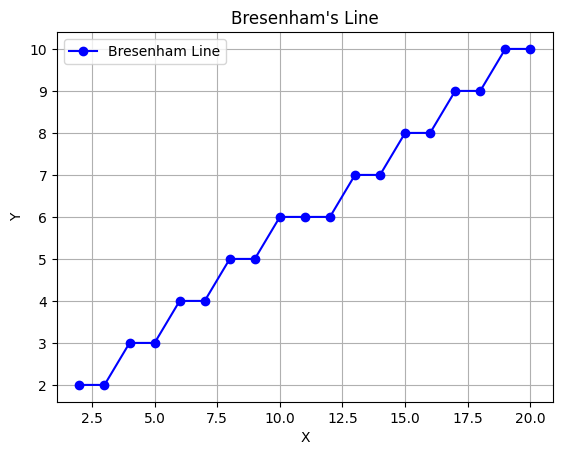

In [1]:
#1. Implement Bresenham’s algorithm as shown.

import matplotlib.pyplot as plt
def bresenham(x0, y0, x1, y1):
    x_coords = []
    y_coords = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    x, y = x0, y0
    while True:
        x_coords.append(x)
        y_coords.append(y)
        if x == x1 and y == y1:
            break  
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy
    return x_coords, y_coords
x0, y0, x1, y1 = 2, 2, 20, 10
x_bres, y_bres = bresenham(x0, y0, x1, y1)
plt.plot(x_bres, y_bres, 'bo-', label='Bresenham Line')
plt.title("Bresenham's Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

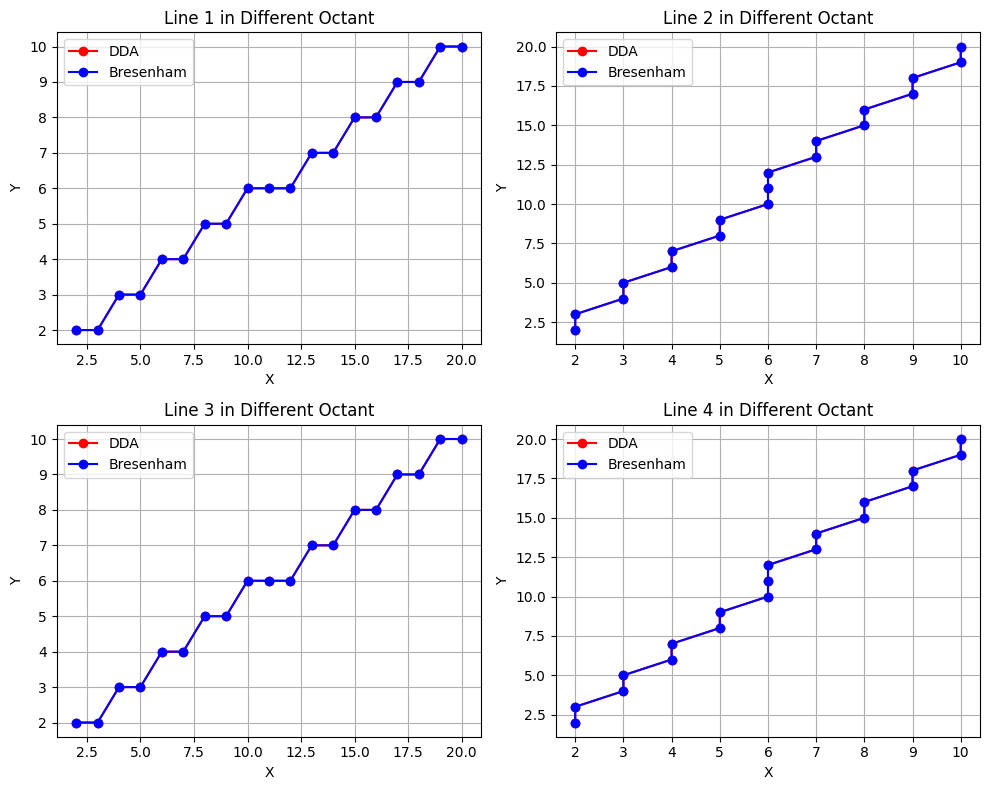

In [2]:
#2. Draw lines for different octants and compare visually with DDA lines.

import matplotlib.pyplot as plt
def dda(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = max(abs(dx), abs(dy))
    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x0, y0
    x_coords = [round(x)]
    y_coords = [round(y)]
    for _ in range(steps):
        x += x_inc
        y += y_inc
        x_coords.append(round(x))
        y_coords.append(round(y))
    return x_coords, y_coords
def bresenham(x0, y0, x1, y1):
    x_coords, y_coords = [], []
    dx, dy = abs(x1-x0), abs(y1-y0)
    sx, sy = (1 if x0<x1 else -1), (1 if y0<y1 else -1)
    err = dx - dy
    x, y = x0, y0
    while True:
        x_coords.append(x)
        y_coords.append(y)
        if x==x1 and y==y1:
            break
        e2 = 2*err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy
    return x_coords, y_coords
lines = [
    (2, 2, 20, 10),   
    (2, 2, 10, 20),   
    (20, 10, 2, 2),   
    (10, 20, 2, 2),   
]
plt.figure(figsize=(10,8))
for i, (x0,y0,x1,y1) in enumerate(lines):
    x_dda, y_dda = dda(x0,y0,x1,y1)
    x_bres, y_bres = bresenham(x0,y0,x1,y1)
    plt.subplot(2,2,i+1)
    plt.plot(x_dda, y_dda, 'ro-', label='DDA')
    plt.plot(x_bres, y_bres, 'bo-', label='Bresenham')
    plt.title(f"Line {i+1} in Different Octant")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

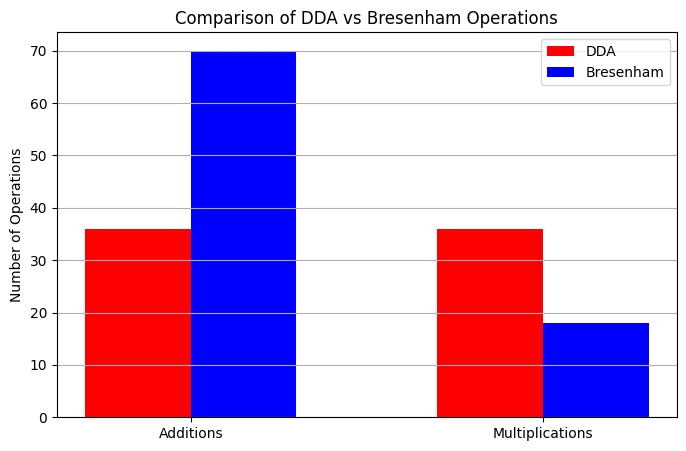

In [1]:
#3. Compare the number of integer additions and multiplications used by DDA andBresenham.

import matplotlib.pyplot as plt
def dda_count_ops(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = max(abs(dx), abs(dy))
    x_inc = dx / steps
    y_inc = dy / steps
    additions = multiplications = 0
    x, y = x0, y0
    for _ in range(steps):
        x += x_inc
        y += y_inc
        additions += 2
        multiplications += 2
    return additions, multiplications
def bresenham_count_ops(x0, y0, x1, y1):
    additions = multiplications = 0
    dx, dy = abs(x1-x0), abs(y1-y0)
    sx, sy = (1 if x0<x1 else -1), (1 if y0<y1 else -1)
    err = dx - dy
    x, y = x0, y0
    while True:
        if x == x1 and y == y1:
            break
        e2 = 2*err
        multiplications += 1
        additions += 1
        if e2 > -dy:
            err -= dy
            x += sx
            additions += 2
        if e2 < dx:
            err += dx
            y += sy
            additions += 2
    return additions, multiplications
x0, y0, x1, y1 = 2, 2, 20, 10
dda_add, dda_mul = dda_count_ops(x0, y0, x1, y1)
bres_add, bres_mul = bresenham_count_ops(x0, y0, x1, y1)
labels = ['Additions', 'Multiplications']
dda_ops = [dda_add, dda_mul]
bres_ops = [bres_add, bres_mul]
x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar([p-0.15 for p in x], dda_ops, width=0.3, label='DDA', color='red')
plt.bar([p+0.15 for p in x], bres_ops, width=0.3, label='Bresenham', color='blue')
plt.xticks(x, labels)
plt.ylabel('Number of Operations')
plt.title('Comparison of DDA vs Bresenham Operations')
plt.legend()
plt.grid(axis='y')
plt.show()